# Project 1 Code

## Importing datasets

In [5]:
import pandas as pd

In [7]:
country_df = pd.read_csv('data/country.csv')
details_df = pd.read_csv('data/details.csv')

## Analyzing datasets

In [19]:
country_df.head

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01


In [74]:
details_df.head()

,country,iso3,components,currency,start_date_observations,end_date_observations,number_of_markets_modeled,number_of_markets_covered,number_of_food_items,number_of_observations_food,...,total_food_price_increase_since_start_date,average_annualized_food_inflation,maximum_food_drawdown,average_annualized_food_volatility,average_monthly_food_price_correlation_between_markets,average_annual_food_price_correlation_between_markets,Rsquared_individual_food_items,Rsquared_individual_other_items,index_confidence_score,imputation_model
0,Afghanistan,AFG,"Bread (1 KG, Index Weight = 1), Rice (Low Qual...",AFN,Jan 2007,Sep 2023,40,40,3,"bread: 2318, rice: 2701, wheat: 2682",...,167.97%,6.06%,-40.67%,7.93%,0.62,0.87,"bread: 0.94, rice: 0.89, wheat: 0.93","exchange_rate_wfp: 1, fuel_diesel: 0.97, wage_...",0.92,"bread: cubist (Andree, 2021), rice: two-stage ..."
1,Burundi,BDI,"Bananas (1 KG, Index Weight = 1), Beans (1 KG,...",BIF,Jan 2007,Aug 2023,72,72,10,"bananas: 5344, beans: 5963, cassava_flour: 594...",...,254.94%,7.86%,-30.77%,12.03%,0.60,0.83,"bananas: 0.88, beans: 0.9, cassava_flour: 0.89...",:,0.90,"bananas: two-stage cubist (Andree and Pape, 20..."
2,Burkina Faso,BFA,"Maize (White) (1 KG, Index Weight = 1), Millet...",XOF,Jan 2007,Jul 2023,64,64,3,"maize: 6615, millet: 7618, sorghum: 7177",...,201.25%,6.81%,-36.7%,13.71%,0.57,0.80,"maize: 0.84, millet: 0.83, sorghum: 0.81",:,0.83,"maize: cubist (Andree, 2021), millet: cubist (..."
3,Central African Republic,CAF,"Cassava (Cossette) (1 KG, Index Weight = 1), M...",XAF,Jan 2007,Jun 2023,42,42,5,"cassava: 2259, maize: 2025, meat_beef: 2147, o...",...,134.62%,5.22%,-24.85%,13.74%,0.39,0.59,"cassava: 0.89, maize: 0.88, meat_beef: 0.95, o...",:,0.89,"cassava: cubist (Andree, 2021), maize: cubist ..."
4,Cameroon,CMR,"Bananas (12 KG, Index Weight = 0.08), Cassava ...",XAF,Apr 2010,Aug 2023,83,83,10,"bananas: 621, cassava: 624, cocoyam: 624, fish...",...,39.02%,2.47%,-2.79%,1.84%,0.25,0.67,"bananas: 0.96, cassava: 0.96, cocoyam: 0.98, f...",:,0.98,"bananas: two-stage cubist (Andree and Pape, 20..."


## Finding null data

In [131]:
country_df.isna().sum()

Open          64
High          64
Low           64
Close         64
Inflation    364
country        0
ISO3           0
date           0
dtype: int64

In [133]:
details_df.isna().sum()

country                                                   0
iso3                                                      0
components                                                0
currency                                                  0
start_date_observations                                   0
end_date_observations                                     0
number_of_markets_modeled                                 0
number_of_markets_covered                                 0
number_of_food_items                                      0
number_of_observations_food                               0
number_of_observations_other                              0
data_coverage_food                                        0
data_coverage_previous_12_months_food                     0
total_food_price_increase_since_start_date                0
average_annualized_food_inflation                         0
maximum_food_drawdown                                     0
average_annualized_food_volatility      

### "details_df" is clean. However, country_df has N/A values, so we need to drop those.

In [115]:
country_df_cleaned = country_df.dropna()
print(country_df_cleaned.isna().sum())

Open         0
High         0
Low          0
Close        0
Inflation    0
country      0
ISO3         0
date         0
dtype: int64


In [117]:
print("Old length: " + str(len(country_df)))
print("New length: " + str(len(country_df_cleaned)))
print("Drop count: " + str(len(country_df) - len(country_df_cleaned)))

Old length: 4798
New length: 4434
Drop count: 364


## Creating visuals

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

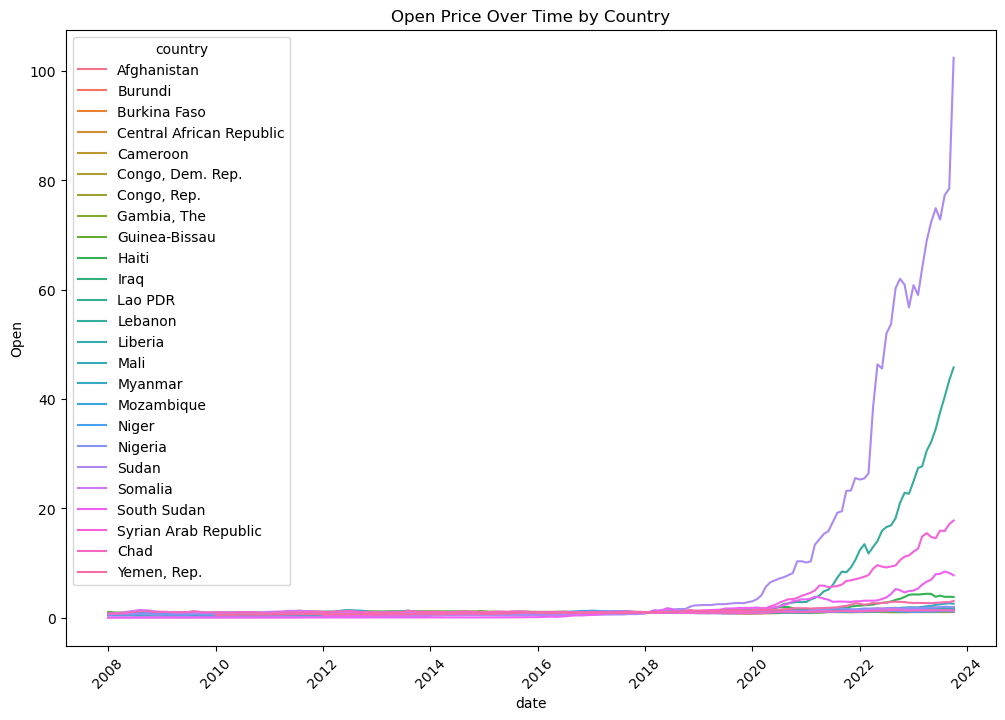

In [273]:
country_df_cleaned = country_df_cleaned.copy() # (turning country_df_cleaned into a proper copy)
country_df_cleaned['date'] = pd.to_datetime(country_df_cleaned['date']) # need to alter the way the date is stored to make it plot friendly!

plt.figure(figsize=(12,8))
sns.lineplot(x='date', y='Open', hue='country', data=country_df_cleaned)
plt.title('Open Price Over Time by Country')

plt.xticks(rotation=45)
plt.show()

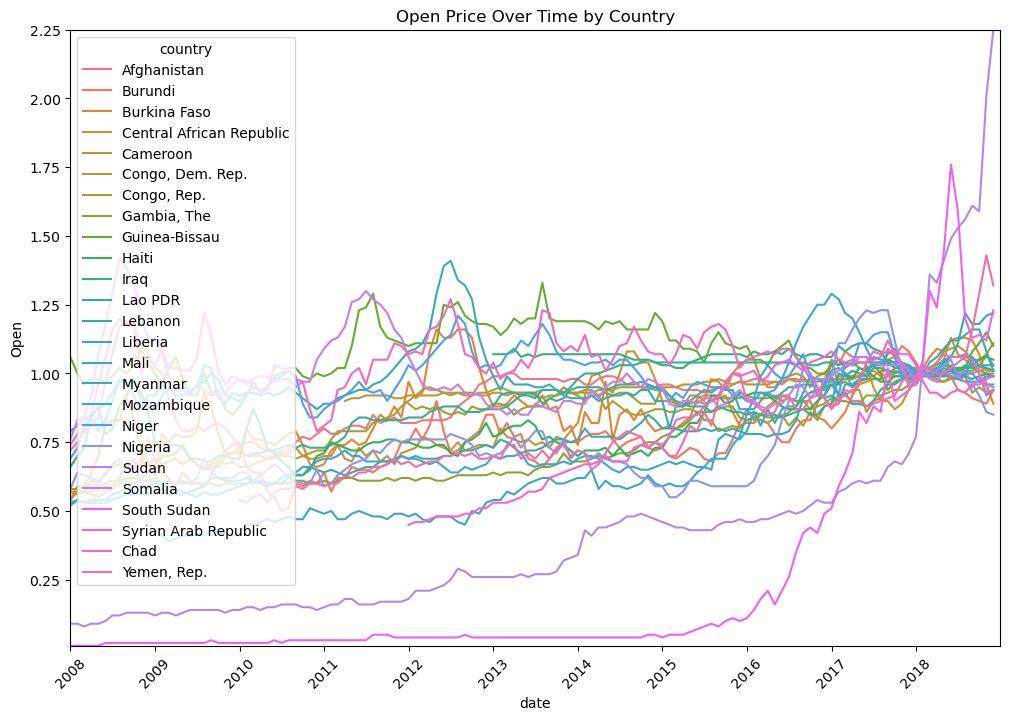

In [267]:
country_df_cleaned = country_df_cleaned.copy()
country_df_cleaned['date'] = pd.to_datetime(country_df_cleaned['date'])

filtered_df = country_df_cleaned[country_df_cleaned['date'] <= pd.Timestamp('2018-12-31')]

max_open_value = filtered_df['Open'].max()

plt.figure(figsize=(12,8))
sns.lineplot(x='date', y='Open', hue='country', data=filtered_df)
plt.title('Open Price Over Time by Country')

plt.xlim(country_df_cleaned['date'].min(), pd.Timestamp('2018-12-31'))
plt.ylim(filtered_df['Open'].min(), max_open_value)

plt.xticks(rotation=45)
plt.show()

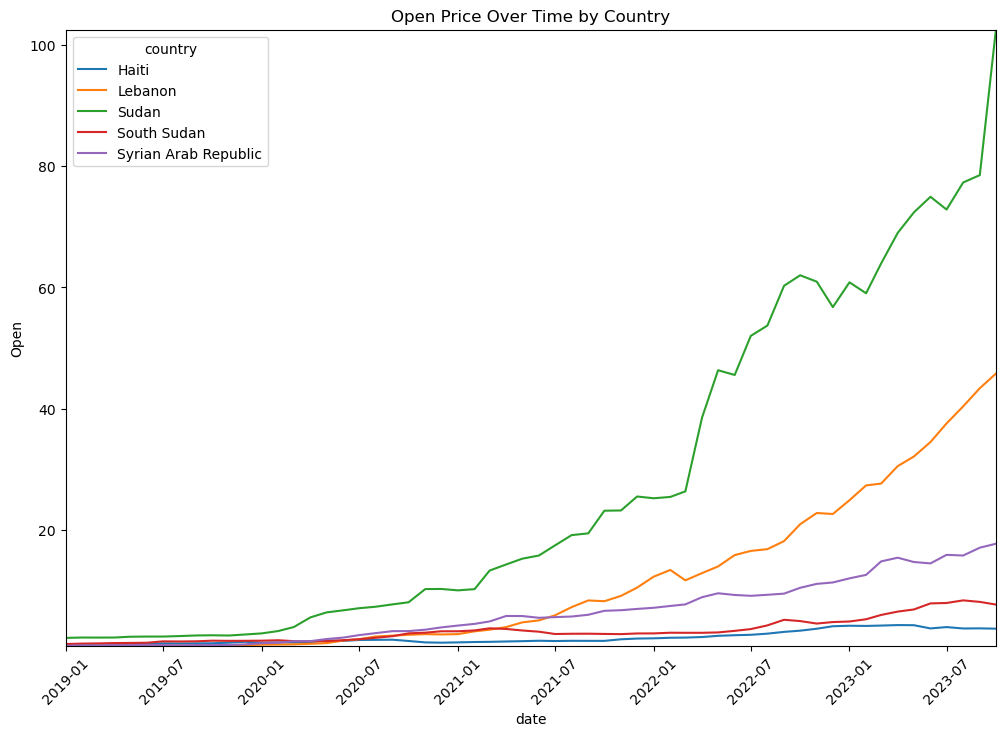

In [263]:
country_df_cleaned = country_df_cleaned.copy()
country_df_cleaned['date'] = pd.to_datetime(country_df_cleaned['date'])

filtered_df_2019_onwards = country_df_cleaned[country_df_cleaned['date'] >= pd.Timestamp('2019-01-01')]

max_values_2019_onwards = filtered_df_2019_onwards.groupby('country')['Open'].max()
min_values_2019_onwards = filtered_df_2019_onwards.groupby('country')['Open'].min()

increase_values = max_values_2019_onwards - min_values_2019_onwards

significant_increase_countries = increase_values[increase_values >= 3].index

df_significant_increase = filtered_df_2019_onwards[filtered_df_2019_onwards['country'].isin(significant_increase_countries)]

min_open_value = df_significant_increase['Open'].min()
max_open_value = df_significant_increase['Open'].max()

plt.figure(figsize=(12,8))
sns.lineplot(x='date', y='Open', hue='country', data=df_significant_increase)
plt.title('Open Price Over Time by Country')

plt.xlim(pd.Timestamp('2019-01-01'), country_df_cleaned['date'].max())
plt.ylim(min_open_value, max_open_value)

plt.xticks(rotation=45)
plt.show()

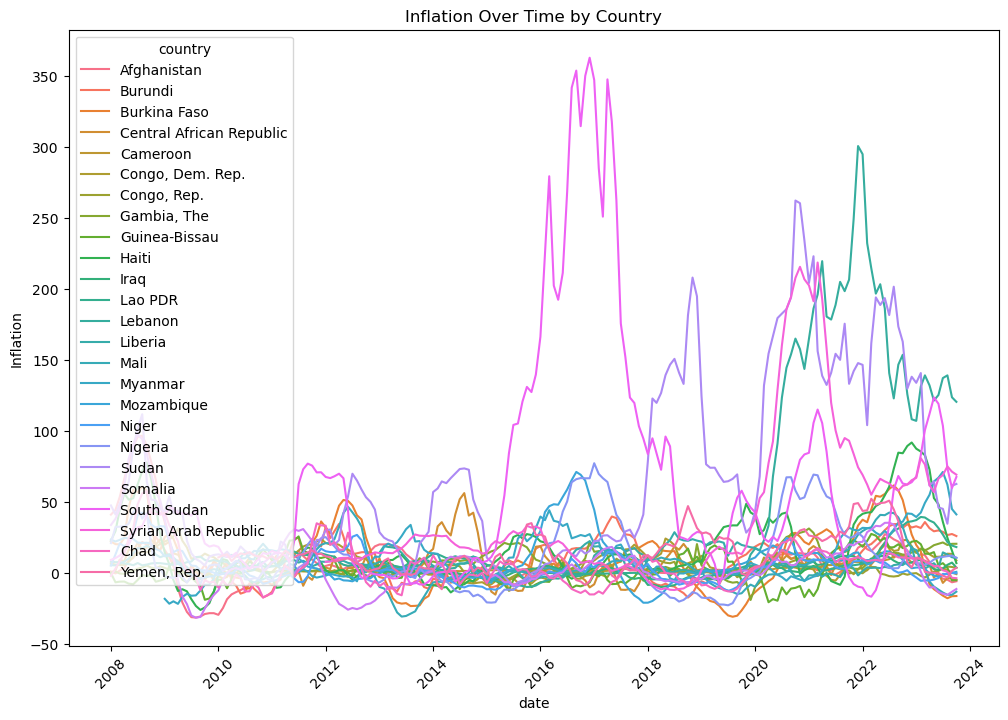

In [281]:
plt.figure(figsize=(12,8))
sns.lineplot(x='date', y='Inflation', hue='country', data=country_df_cleaned)
plt.title('Inflation Over Time by Country')

plt.xticks(rotation=45)
plt.show()